# Figure 5 a,b,c,d

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
import seaborn
import sklearn.decomposition
%matplotlib inline
#matplotlib.rc('text', usetex=True)

In [2]:
seaborn.set_context("paper")
seaborn.set_style("whitegrid")

In [3]:
dataPath = '../generatedData/fig5/'

In [4]:
ar = np.load(dataPath+'original.npz')

In [5]:
N = 5000

In [8]:
total_fraction = np.sum(ar['weights']!=0)/float(N**2)
excitation_fraction = np.sum(ar['weights']>0)/float(N**2)/0.8
inhibition_fraction = np.sum(ar['weights']<0)/float(N**2)/0.2
print("Total connectivity: %.1f%%\nExcitatory connectivity: %.1f%%\nInhibitory connectivity: %.1f%%" % (total_fraction*100, excitation_fraction*100, inhibition_fraction*100))

Total connectivity: 12.4%
Excitatory connectivity: 10.8%
Inhibitory connectivity: 19.0%


In [10]:
print(np.mean(ar['weights'][:4000, :4000]>0))
print(np.mean(ar['weights'][4000:, :4000]>0))
print(np.mean(ar['weights'][:4000, 4000:]<0))
print(np.mean(ar['weights'][4000:, 4000:]<0))

0.1076375625
0.10784025
0.1907065
0.189381


In [11]:
print(np.mean(ar['weights'][:, :4000]>0))
print(np.mean(ar['weights'][:, 4000:]<0))

0.1076781
0.1904414


In [12]:
e_sum, i_sum = np.sum(ar['weights'][:,:4000], axis=1), np.sum(ar['weights'][:,4000:], axis=1)

(-7, 0)

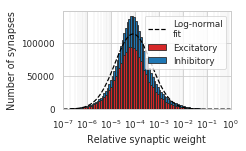

In [13]:
#matplotlib.rc('text', usetex=True)
excitatory = ar['weights'][ar['weights']>0].flatten()
inhibitory = -ar['weights'][ar['weights']<0].flatten()
plt.figure(figsize=(3.0,1.8))
ax = plt.gca()
colors = (seaborn.color_palette()[3], seaborn.color_palette()[0])
ax.hist((np.log10(excitatory),np.log10(inhibitory)), bins=100, range=(-7,0), stacked=True, color=colors, width=7e-2, edgecolor=(.15,.15,.15))

xx = np.linspace(-7,0,100)
logWeights = np.log10(np.concatenate((excitatory, inhibitory)))
loc, scale = logWeights.mean(), logWeights.std()

numWeights = np.sum(np.logical_and(logWeights>-7, logWeights<0))
#*len(logWeights)*7.0/100.0
ax.plot(xx, scipy.stats.norm.pdf(xx, loc, scale)*numWeights*7/100.0, 'k--',)

class LogMinors(matplotlib.ticker.LinearLocator):
    def tick_values(self,vmin, vmax):
        tickPos = []
        for i in np.arange(vmin,vmax):
            tickPos += [i] + list(i + np.log10(np.arange(2,10)))
        return np.array(tickPos)
ax.get_xaxis().set_minor_locator(LogMinors())
ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.get_xaxis().set_major_locator(matplotlib.ticker.LinearLocator(numticks=8))
ax.get_xaxis().set_major_formatter(matplotlib.ticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
ax.grid(b=True, which='minor', color='lightgray', linewidth=0.3)
#ax.get_xaxis().set_major_locator(matplotlib.ticker.LogLocator())
ax.set_xlabel("Relative synaptic weight")
ax.set_ylabel("Number of synapses")
ax.legend(("Log-normal\nfit", "Excitatory", "Inhibitory"), frameon=True)
#tickPos = []
#tickLabels = []
#for i in range(-7,1):
#    tickPos += [i] + list(i + np.log10(np.arange(2,10)))
#    tickLabels += [r"$10^{%d}$"%(i)]+8*[""]
#plt.xticks(tickPos, tickLabels)
plt.xlim(-7, 0)
#plt.savefig("fig5_parts/dist.svg", dpi=300)

Text(0, 0.5, '$\\Sigma$ inhibitory')

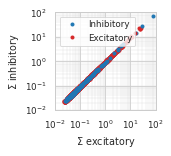

In [14]:
plt.figure(figsize=(1.8,1.8))
ax = plt.gca()
ax.loglog(e_sum[4000:4800], -i_sum[4000:4800], '.', color=seaborn.color_palette()[0], ms=6)
ax.loglog(e_sum[:4000], -i_sum[:4000], '.', color=seaborn.color_palette()[3], ms=6)
ax.loglog(e_sum[4800:], -i_sum[4800:], '.', color=seaborn.color_palette()[0], ms=6)
ax.axis([1e-2,1e2,1e-2,1e2])
#ticks = np.concatenate([np.arange(a,10*a,a) for a in (1e-2,1e-1,1,10)])
#ax.set_xlim(-2,2)
#ax.set_ylim(-2,2)
#ax.set_xticks(ticks)
#ax.yticks(ticks)
ax.get_xaxis().set_minor_locator(matplotlib.ticker.LogLocator(subs='all', numticks=5))
ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.get_xaxis().set_major_locator(matplotlib.ticker.LogLocator(numticks=5))
ax.get_yaxis().set_minor_locator(matplotlib.ticker.LogLocator(subs='all'))
ax.get_yaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.get_yaxis().set_major_locator(matplotlib.ticker.LogLocator())
#ax.get_xaxis().set_label("X")
ax.legend(("Inhibitory", "Excitatory"), loc=2, frameon=True)
ax.grid(b=True, which='minor', color='lightgray', linewidth=0.3)
ax.set_xlabel("$\Sigma$ excitatory") #incomming
ax.set_ylabel("$\Sigma$ inhibitory")
#plt.tight_layout()
#plt.savefig("fig5_parts/weight_ei_balance.svg", dpi=300)
#plt.show()

In [15]:
singularValues = np.linalg.svd(ar['weights'], compute_uv=False)

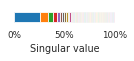

In [16]:
palette = seaborn.color_palette(n_colors=6) + seaborn.color_palette("Dark2_r", n_colors=8, desat=0.6)
plt.figure(figsize=(1.8,.2))
percent = singularValues/np.sum(singularValues)*100
for i in range(len(percent)):
    plt.barh(0.5,percent[i],1,np.sum(percent[:i]), color=palette[i%len(palette)]) # edgecolor=(.15,.15,.15)
#plt.xlim(0,1)
#plt.ylim(0,100)
plt.yticks([])
plt.xticks(range(0,101,50), ["%d%%"%i for i in range(0,101,50)])
plt.xlabel("Singular value")
seaborn.despine(bottom=True, left=True)
#plt.tight_layout()
#plt.savefig("fig5_parts/singular.svg", dpi=300)
#plt.xlabel()

In [17]:
scipy.stats.kurtosis(logWeights, fisher=False)

4.526329078001644

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/home/emil/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


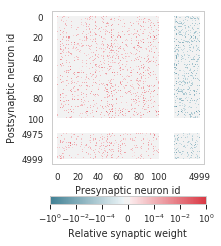

In [19]:
cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
norm=matplotlib.colors.SymLogNorm(5e-6,vmin=-1,vmax=1)

fullImage = np.empty((150,150))*np.nan
fullImage[5:105, 5:105] = ar['weights'][:100,:100] #E-E
fullImage[5:105, 120:145] = ar['weights'][:100,-25:] #E-I
fullImage[120:145, 5:105] = ar['weights'][-25:,:100] #I-E
fullImage[120:145, 120:145] = ar['weights'][-25:,-25:] #I-I

plt.figure(figsize=(4, 4))
plt.imshow(fullImage, interpolation='nearest', cmap=cmap, norm=norm, aspect='equal')
plt.xticks(list(range(5,120,20))+[145], list(range(0,120,20))+[N-1])
plt.yticks(list(range(5,120,20))+[120,145], list(range(0,120,20))+[N-25, N-1])
plt.xlabel("Presynaptic neuron id")
plt.ylabel("Postsynaptic neuron id")
plt.grid('off')
cbar = plt.colorbar(label="Relative synaptic weight", orientation='horizontal', shrink = .7)
#cbar.set_ticks((-1,-0.001,0,0.001, 1))
#cbar.set_ticklabels(("$-10^0$", "$-10^{-3}$", "0", "$10^{-3}$", "$10^{0}$"))
cbar.set_ticks((-1,-0.01,-0.0001,0,0.0001,0.01, 1))
cbar.set_ticklabels(("$-10^0$", "$-10^{-2}$", "$-10^{-4}$", "$0$", "$10^{-4}$", "$10^{-2}$", "$10^{0}$"))
#plt.tight_layout()
#plt.savefig('fig5_parts/matrix.svg', dpi=300)

# Previous versions (Python2)

Can be safely ignored

### Connection probabilities

In [ ]:
print "%.2f%%" % (100*np.count_nonzero(ar['weights'][:4000,:4000])/4000.0/4000.0) #E -> E
print "%.2f%%" % (100*np.count_nonzero(ar['weights'][4000:,:4000])/4000.0/1000.0) #E -> I
print "%.2f%%" % (100*np.count_nonzero(ar['weights'][:4000,4000:])/1000.0/4000.0) #I -> E
print "%.2f%%" % (100*np.count_nonzero(ar['weights'][4000:,4000:])/1000.0/1000.0) #I -> I

In [ ]:
e_sum, i_sum = np.sum(ar['weights'][:,:4000], axis=1), np.sum(ar['weights'][:,4000:], axis=1)

In [ ]:
%matplotlib inline
#plt.figure(figsize=(3.25,3.25))
fig, ax = plt.subplots(1, 1,figsize=(3.75,3.75))
ax.loglog(e_sum[4000:4800], -i_sum[4000:4800], '.', color=seaborn.color_palette()[0], ms=6)
ax.loglog(e_sum[:4000], -i_sum[:4000], '.', color=seaborn.color_palette()[2], ms=6)
ax.loglog(e_sum[4800:], -i_sum[4800:], '.', color=seaborn.color_palette()[0], ms=6)
#plt.scatter(e_sum[4000:], i_sum[4000:], s=10, c=seaborn.color_palette()[0])
##plt.scatter(e_sum[:4000], i_sum[:4000], s=10, c=seaborn.color_palette()[2])
ax.axis([1e-2,1e2,1e-2,1e2])
ticks = np.concatenate([np.arange(a,10*a,a) for a in (1e-2,1e-1,1,10)])
#plt.ylim(0,-5)
#ax.xticks(ticks)
#ax.yticks(ticks)
ax.get_xaxis().set_minor_locator(matplotlib.ticker.LogLocator(subs='all'))
ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.get_xaxis().set_major_locator(matplotlib.ticker.LogLocator())
ax.get_yaxis().set_minor_locator(matplotlib.ticker.LogLocator(subs='all'))
ax.get_yaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.get_yaxis().set_major_locator(matplotlib.ticker.LogLocator())
#ax.get_xaxis().set_label("X")
ax.legend(("Inhibitory neurons", "Excitatory neurons"), loc=2)
ax.grid(b=True, which='minor', color='w', linewidth=0.4)
ax.set_xlabel("Sum of incomming excitatory weights") #
ax.set_ylabel("Sum of incomming inhibitory weights")
fig.tight_layout()
plt.savefig("../figures/weight_ei_balance.tif", dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(2.5,4))
plt.bar(np.arange(25), np.linalg.svd(ar['weights'], compute_uv=False)[:25])

In [ ]:
cov_matrix = ar['weights'].dot(ar['weights'].T)

In [ ]:
cor_matrix = cov_matrix / np.sqrt(np.outer(cov_matrix.diagonal(), cov_matrix.diagonal()))

In [ ]:
plt.hist(cor_matrix.flatten(), range=(0,1.0), bins=50, log=True)
plt.xlabel("Correlation")
plt.ylabel("Number of pairs")

In [ ]:
np.linalg.eig(ar['weights'])[0][:25]

In [ ]:
seaborn.palplot(seaborn.color_palette())

In [ ]:
dat=np.random.choice((0,1), p=(0.8,0.2), replace=True, size=(2000,2))
np.corrcoef(dat, rowvar=0)

In [ ]:
N = ar['spikes'].shape[1]
spike_bin_time = 40 #ms
spike_vectors = ar['spikes'].reshape(-1,40,N).sum(axis=1)/1000

In [ ]:
pca = sklearn.decomposition.PCA().fit(spike_vectors)
plt.figure(figsize=(7.5, 5))
plt.subplot2grid((2,3),(1,0),colspan=1)
plt.bar(np.arange(20)+0.5, pca.explained_variance_ratio_[:20])
plt.yticks(np.arange(0,0.3,0.05), ["%d\%%"%i for i in range(0,30,5)])
plt.xticks(np.arange(0,20,3)+1, np.arange(0,20,3)+1)
plt.xlim(0,21)
plt.xlabel("Dimension")
plt.ylabel("Fraction of total variance")
plt.subplot2grid((2,3),(0,0),colspan=3)
components = pca.transform(spike_vectors)[:,:4]
colors = np.array(seaborn.color_palette())[(1,3,4,5), :]
for i in range(4):
    plt.plot(np.linspace(0,10*1000,250), components[:,i], '-*', c=colors[i])
plt.yticks([0])
plt.xlim(0,2*1000)
plt.xlabel("Time [ms]")
plt.ylabel("Projection to PC")
plt.legend(["First", "Second", "Third", "Fourth"], ncol=4, loc=2)
plt.ylim(-80,120)
for i in range(2):
    plt.subplot2grid((2,3),(1,i+1))
    plt.plot(components[:,0+2*i], components[:,1+2*i])
    plt.axis('equal')
    plt.xlim(-100,100)
    plt.ylim(-100,100)
    plt.xticks([0])
    plt.yticks([0])
    plt.xlabel(["First component", "Third component"][i])
    plt.ylabel(["Second component", "Fourth component"][i])
plt.tight_layout()
plt.savefig('../figures/principal_component_analysis.tiff', dpi=300, transparent=False, frameon=False)

In [ ]:
np.sum(pca.explained_variance_ratio_[:4])

In [ ]:
plt.figure(figsize=(10,10))
for i in range(4):
    for j in range(4):
        plt.subplot2grid((4,4),(i,j))
        plt.plot(components[:,i], components[:,j])
        plt.axis('equal')
        plt.xlim(-120,120)
        plt.ylim(-120,120)
        plt.xticks([0])
        plt.yticks([0])
        plt.xlabel(["First", "Second", "Third", "Fourth"][i] + " component")
        plt.ylabel(["First", "Second", "Third", "Fourth"][j] + " component")
plt.tight_layout()

In [ ]:
fa = sklearn.decomposition.FactorAnalysis(iterated_power=8, n_components=30)
fa.fit(spike_vectors)

In [ ]:
cov = fa.components_.dot(fa.components_.T)
eigs = np.linalg.eigvalsh(cov)[::-1]
plt.bar(np.arange(30)+0.5, eigs[:30]/np.sum(eigs))